In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets,linear_model
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm

### Reading Dataset ###

In [2]:
bc =  pd.read_csv('breast-cancer-data.csv')
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### DataSet Analysis ####

In [3]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
bc.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

__Here alll the field numerical except diagnosis is a catagorical variable which will be terget variable.__

Convert to catagorical variable

In [10]:
bc.diagnosis = pd.Categorical(bc.diagnosis).codes

In [11]:
bc.diagnosis.unique()

array([1, 0], dtype=int64)

__Create Terget and independent Variable __

In [16]:
y = bc.diagnosis
X = bc.drop(['id','diagnosis'],axis=1)

In [18]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Dimensionality Reduction ###

### Using PCA ###

In [20]:
pca = PCA().fit(X)

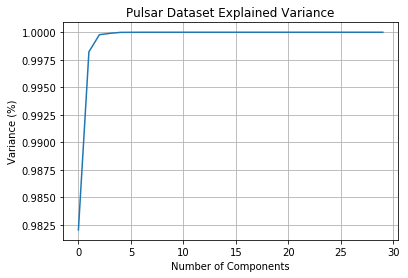

In [22]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.grid(True)
plt.show()

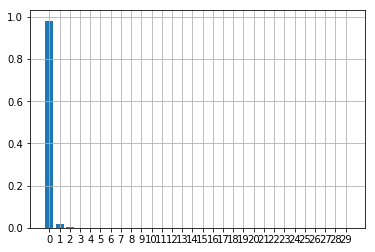

In [24]:
#Scree plot 
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xticks(range(pca.n_components_))
plt.grid(True)

__So Component will be requrie max 3__

In [25]:
pca = PCA(n_components=3)
PC = pca.fit_transform(X)

In [26]:
X_train,X_test,y_train,y_test  =  train_test_split(PC,y,test_size=.30)

__Logistic Regression__

In [31]:
lg = linear_model.LogisticRegression()
mlg= lg.fit(X_train,y_train)


In [32]:
y_pred = mlg.predict(X_test)
mlg.score(X_test,y_test)

0.9298245614035088

In [34]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       114
          1       0.91      0.88      0.89        57

avg / total       0.93      0.93      0.93       171



__Decision Tree__

In [36]:
dc = DecisionTreeClassifier()
mdc = dc.fit(X_train,y_train)
y_pred = mlg.predict(X_test)
print(mdc.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.9239766081871345
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       114
          1       0.91      0.88      0.89        57

avg / total       0.93      0.93      0.93       171



__Random Forest__

In [40]:
rf = RandomForestClassifier()
mrf = rf.fit(X_train,y_train)
y_pred = mrf.predict(X_test)
print(mrf.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.9590643274853801
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       114
          1       0.95      0.93      0.94        57

avg / total       0.96      0.96      0.96       171



__SVM__

In [41]:
# Fit the SVM model
sv = svm.SVC()
msv = sv.fit(X_train,y_train)
y_pred = msv.predict(X_test)
print(msv.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.6666666666666666
             precision    recall  f1-score   support

          0       0.67      1.00      0.80       114
          1       0.00      0.00      0.00        57

avg / total       0.44      0.67      0.53       171



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Using LDA ##

In [42]:
# Create an LDA that will reduce the data 
lda = LinearDiscriminantAnalysis()

# run an LDA and use it to transform the features based on the terget variable
X_lda = lda.fit(X,y).transform(X)

In [43]:
# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 30
Reduced number of features: 1


In [51]:
X_train,X_test,y_train,y_test  =  train_test_split(X_lda,y,test_size=.30,random_state=2)

__Logistic Regression__

In [52]:
lg = linear_model.LogisticRegression()
mlg= lg.fit(X_train,y_train)
y_pred = mlg.predict(X_test)
print(mlg.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.9824561403508771
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       104
          1       1.00      0.96      0.98        67

avg / total       0.98      0.98      0.98       171



__Decision Tree__

In [53]:
dc = DecisionTreeClassifier()
mdc = dc.fit(X_train,y_train)
y_pred = mlg.predict(X_test)
print(mdc.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.9766081871345029
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       104
          1       1.00      0.96      0.98        67

avg / total       0.98      0.98      0.98       171



__Random Forest__

In [54]:
rf = RandomForestClassifier()
mrf = rf.fit(X_train,y_train)
y_pred = mrf.predict(X_test)
print(mrf.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.9824561403508771
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       104
          1       1.00      0.96      0.98        67

avg / total       0.98      0.98      0.98       171



__SVM__

In [55]:
# Fit the SVM model
sv = svm.SVC()
msv = sv.fit(X_train,y_train)
y_pred = msv.predict(X_test)
print(msv.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.9824561403508771
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       104
          1       1.00      0.96      0.98        67

avg / total       0.98      0.98      0.98       171



## Conclusion ##

### With LDA [Dimensionality Reduction] and Random Forest/ Logistic Regression model provide great score and prediction with test data. 